In [127]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
sbn.set_style("whitegrid")

In [129]:
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [130]:
# SEGMENT 1: EXPLORING THE DATA.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [131]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [132]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [133]:
# descriptive stats
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [134]:
# stats of all variables including non numerical ones
df.describe(include = 'all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [135]:
# Correlation calc
correlation = df.corr()
correlation

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


Text(0.5, 1.0, 'CORRELATION OF THE VARIABLES')

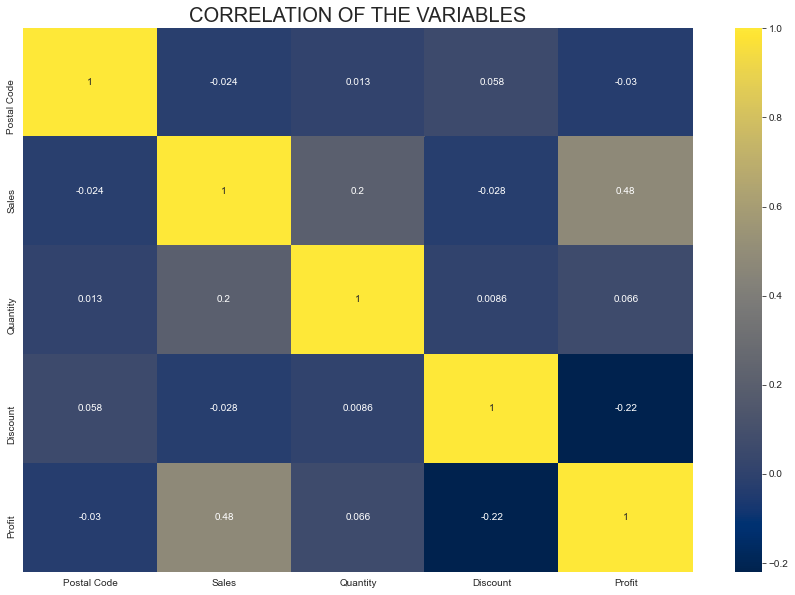

In [136]:
# HeatMap
plt.figure(figsize=(15,10))
sbn.heatmap(correlation, annot = True, cmap = 'cividis')
plt.title("CORRELATION OF THE VARIABLES", fontsize = 20)

In [137]:
# SEGMENT 2: VISUALISING THE DATA.
# univariate analysis
# Analysis 1: calculating the share of each customer segment

df['Segment'].nunique()

3

In [138]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [139]:
# calculation % of each segment
val1 = df['Segment'].value_counts()/len(df['Segment'])*100
val1

Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: Segment, dtype: float64

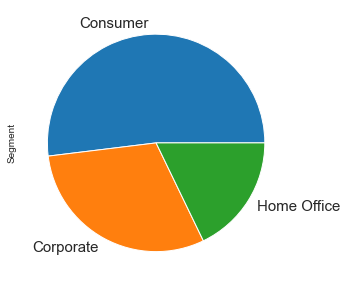

In [140]:
# plotting above values
plt.figure(figsize=(8,5))
A = (val1).plot(kind="pie",fontsize=15)
plt.show()

In [141]:
# Analysis 2: calculating the share of each category of purchases:
df['Category'].nunique()

3

In [142]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [143]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [144]:
# calculating percentages of the above 3 categories:
val2 = df['Category'].value_counts()/len(df['Category'])*100
val2

Office Supplies    60.296178
Furniture          21.222734
Technology         18.481089
Name: Category, dtype: float64

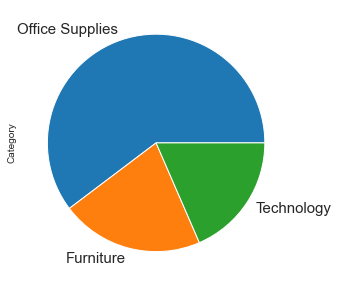

In [145]:
# plotting analysis 2
plt.figure(figsize=(8,5))
B = (val2).plot(kind="pie",fontsize=15)
plt.show()

In [146]:
# Analysis 3: analysing the sub-category of purchases
df['Sub-Category'].nunique()

17

In [147]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [148]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [149]:
# Percentage calculation
val3 = df['Sub-Category'].value_counts()/len(df['Sub-Category'])*100
val3

Binders        15.239143
Paper          13.708225
Furnishings     9.575745
Phones          8.895337
Storage         8.465079
Art             7.964779
Accessories     7.754653
Chairs          6.173704
Appliances      4.662798
Labels          3.642185
Tables          3.191915
Envelopes       2.541525
Bookcases       2.281369
Fasteners       2.171303
Supplies        1.901141
Machines        1.150690
Copiers         0.680408
Name: Sub-Category, dtype: float64

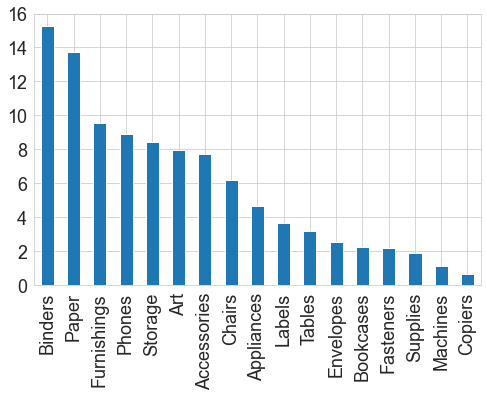

In [150]:
# plotting the above analysis 3, using bar graphs since large # of sub-categories
plt.figure(figsize=(8,5))
C = val3.plot(kind="bar", fontsize = 18)

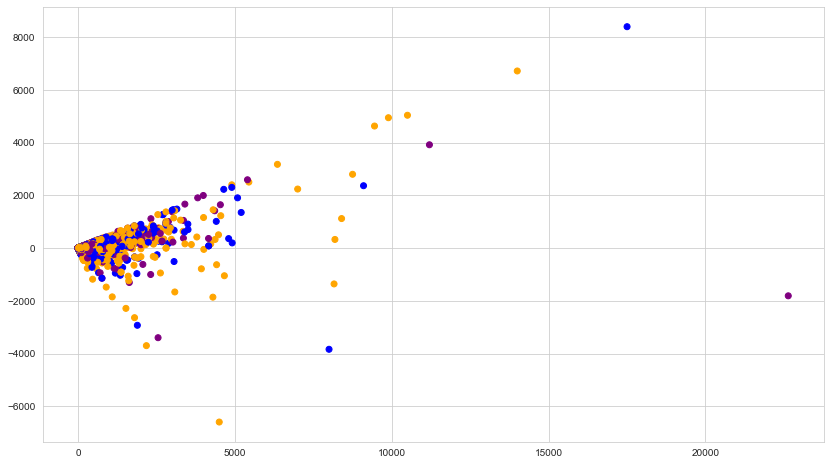

In [151]:
# let's analyse which segment has more profit.
# we need bivariate analysis for this
fig, ax = plt.subplots(figsize=(14,8))
colors = {'Consumer':'orange','Corporate':'blue','Home Office':'purple'}
ax.scatter(df['Sales'],df['Profit'],c= df['Segment'].apply(lambda x : colors[x]))
plt.show()

In [152]:
# inference: more profit in consumer than corporate
# constructing pivot tables
df.pivot_table(values = 'Sales',index = 'Segment',columns = 'Discount',aggfunc = 'median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,51.900,365.598,307.666,51.540,361.011,328.3992,289.404,353.24025,292.100,23.526,12.051,8.568
Corporate,58.580,245.646,480.165,52.184,347.361,307.6660,338.679,562.29250,302.450,21.936,12.060,9.264
Home Office,49.645,191.646,411.332,52.680,362.901,341.9992,212.856,427.23725,433.935,22.608,12.957,8.769


In [153]:
# profit vs discount pivot table
df.pivot_table(values = 'Profit',index = 'Segment',columns = 'Discount',aggfunc = 'median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,16.1240,62.0390,5.12940,6.0433,-26.0562,-30.0980,-47.21360,-135.68145,-175.2600,-14.1323,-8.7276,-13.7175
Corporate,16.2688,46.7908,26.27735,6.7054,-28.2240,-59.0606,-87.27495,-255.58750,-120.5130,-10.4196,-8.9796,-16.3800
Home Office,15.4546,37.2300,16.79860,7.2576,-18.2040,-57.3234,-49.71900,-175.14690,-237.8425,-14.2290,-9.7608,-14.0328


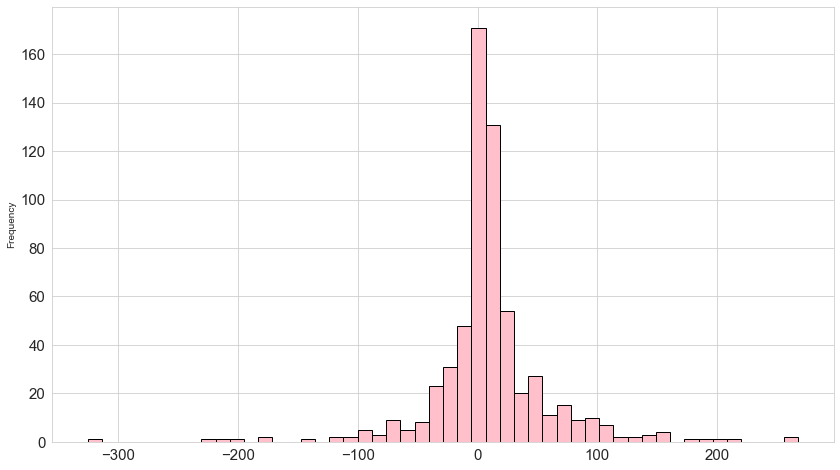

In [154]:
# inference: stores go in loss if discount > 30%
# let's plot histograms for the categories to see if 
# this observation is common across all categories

temp_df = df.loc[(df['Category']=='Furniture')&(df['Discount']==0.2)]
plt.figure(figsize=(14,8))
temp_df['Profit'].plot.hist(bins = 50,edgecolor='black',color='pink',fontsize=15)

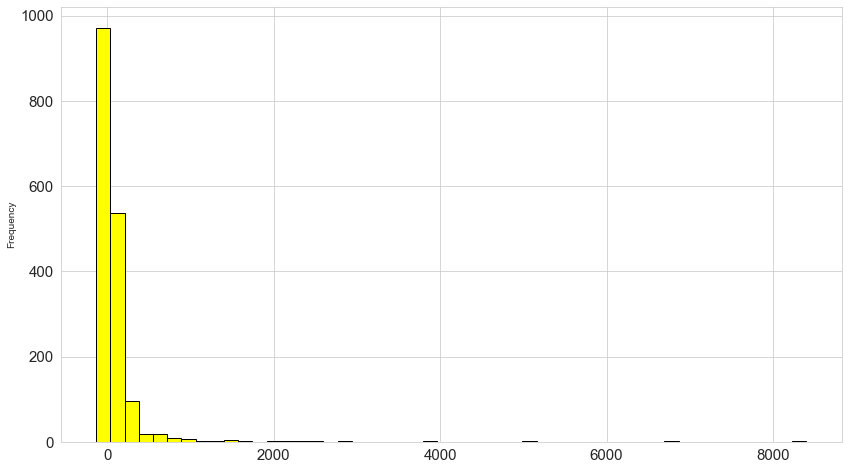

In [155]:
temp_df = df.loc[(df['Category']=='Technology')&(df['Discount']<= 0.3)]
plt.figure(figsize=(14,8))
temp_df['Profit'].plot.hist(bins = 50,edgecolor='black',color='yellow',fontsize=15)

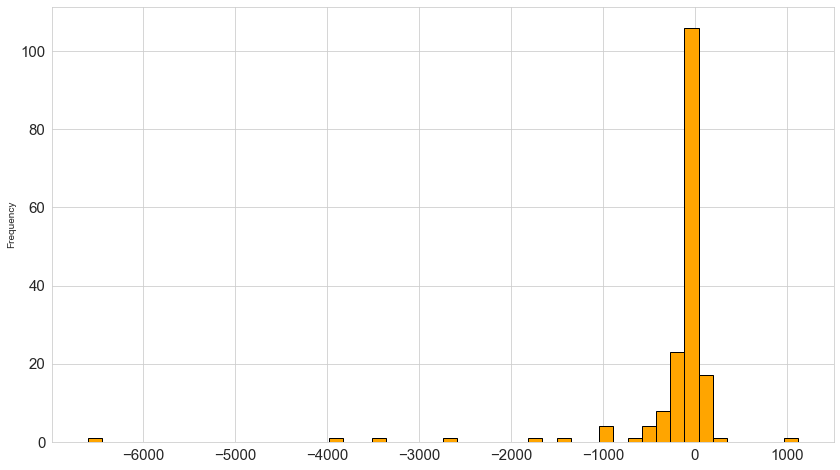

In [156]:
temp_df = df.loc[(df['Category']=='Technology')&(df['Discount'] >= 0.3)]
plt.figure(figsize=(14,8))
temp_df['Profit'].plot.hist(bins = 50,edgecolor='black',color='orange',fontsize=15)

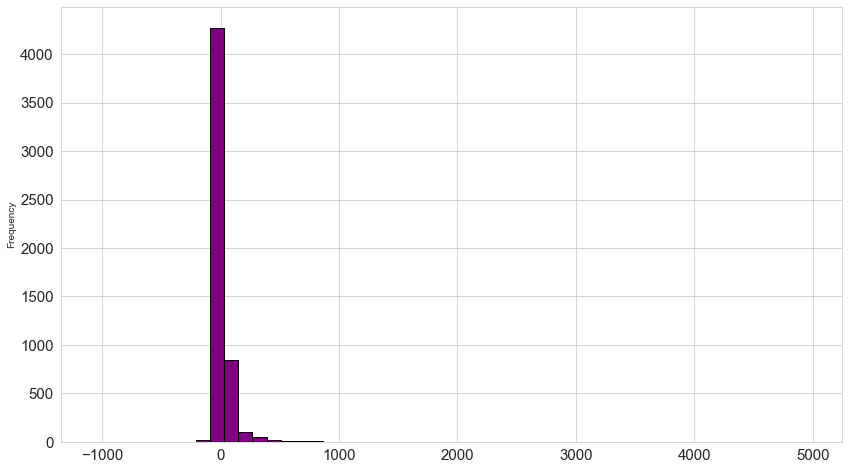

In [157]:
temp_df = df.loc[(df['Category']=='Office Supplies')&(df['Discount']<= 0.3)]
plt.figure(figsize=(14,8))
temp_df['Profit'].plot.hist(bins = 50,edgecolor='black',color='purple',fontsize=15)

In [158]:
print("The inference from the above graphs is that irrespective of the category, the store runs at profit for discounts lesser than 30% and in loss for gretaer than 30%")

The inference from the above graphs is that irrespective of the category, the store runs at profit for discounts lesser than 30% and in loss for gretaer than 30%
